In [1]:
import warnings
warnings.filterwarnings('ignore')
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
house=pd.read_csv('Future Data.csv')

In [3]:
house.shape

(1459, 80)

In [4]:
house.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [6]:
house.describe(include='object').T

count unique      top  freq
MSZoning       1455      5       RL  1114
Street         1459      2     Pave  1453
Alley           107      2     Grvl    70
LotShape       1459      4      Reg   934
LandContour    1459      4      Lvl  1311
Utilities      1457      1   AllPub  1457
LotConfig      1459      5   Inside  1081
LandSlope      1459      3      Gtl  1396
Neighborhood   1459     25    NAmes   218
Condition1     1459      9     Norm  1251
Condition2     1459      5     Norm  1444
BldgType       1459      5     1Fam  1205
HouseStyle     1459      7   1Story   745
RoofStyle      1459      6    Gable  1169
RoofMatl       1459      4  CompShg  1442
Exterior1st    1458     13  VinylSd   510
Exterior2nd    1458     15  VinylSd   510
MasVnrType      565      3  BrkFace   434
ExterQual      1459      4       TA   892
ExterCond      1459      5       TA  1256
Foundation     1459      6    PConc   661
BsmtQual       1415      4       TA   634
BsmtCond       1414      4       TA  1295
BsmtExposure   1415      4       No   951
BsmtFinType1   1417      6      GLQ   431
BsmtFinType2   1417      6      Unf  1237
Heating        1459      4     GasA  1446
HeatingQC      1459      5       Ex   752
CentralAir     1459      2        Y  1358
Electrical     1459      4    SBrkr  1337
KitchenQual    1458      4       TA   757
Functional     1457      7      Typ  1357
FireplaceQu     729      5       Gd   364
GarageType     1383      6   Attchd   853
GarageFinish   1381      3      Unf   625
GarageQual     1381      4       TA  1293
GarageCond     1381      5       TA  1328
PavedDrive     1459      3        Y  1301
PoolQC            3      2       Ex     2
Fence           290      4    MnPrv   172
MiscFeature      51      3     Shed    46
SaleType       1458      9       WD  1258
SaleCondition  1459      6   Normal  1204

In [7]:
house.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [8]:
null_columns=house.columns[house.isnull().any()]

In [9]:
list(null_columns)

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [10]:
house[null_columns].isnull().sum()*100/len(house)

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [11]:
house[null_columns].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

## <font color = maroon> First, Looking for the values in each column that they have correct unique values 

In [12]:
house["MSZoning"].unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [13]:
house["MSZoning"] = np.where(house["MSZoning"] == "C (all)", "C", house["MSZoning"])

In [14]:
house["Neighborhood"].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt',
       'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes',
       'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr',
       'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV',
       'Veenker'], dtype=object)

In [15]:
house["Neighborhood"] = np.where(house["Neighborhood"] == "NAmes", "Names", house["Neighborhood"])

In [16]:
house["BldgType"].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object)

In [17]:
house["BldgType"] = np.where(house["BldgType"] == "2fmCon", "2FmCon", house["BldgType"])
house["BldgType"] = np.where(house["BldgType"] == "Duplex", "Duplx", house["BldgType"])
house["BldgType"] = np.where(house["BldgType"] == "Twnhs", "TwnhsI", house["BldgType"])

In [18]:
house["BldgType"].unique()

array(['1Fam', 'TwnhsE', 'TwnhsI', 'Duplx', '2FmCon'], dtype=object)

In [19]:
house["Exterior1st"].unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
       'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
       nan, 'CBlock'], dtype=object)

In [20]:
house["Exterior2nd"].unique()

array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'Brk Cmn',
       'CmentBd', 'ImStucc', 'Wd Shng', 'AsbShng', 'Stucco', 'CBlock',
       'BrkFace', 'AsphShn', nan, 'Stone'], dtype=object)

In [21]:
house["Exterior2nd"] = np.where(house["Exterior2nd"] == "Wd Shng", "WdShing", house["Exterior2nd"])
house["Exterior2nd"] = np.where(house["Exterior2nd"] == "CmentBd", "CemntBd", house["Exterior2nd"])
house["Exterior2nd"] = np.where(house["Exterior2nd"] == "Brk Cmn", "BrkComm", house["Exterior2nd"])

## <font color = maroon> Second, now Handling the missing values:-

In [22]:
house['LotFrontage'].fillna(value=house['LotFrontage'].mean(), inplace= True)

In [23]:
house['Alley'].fillna(value='NA', inplace= True)

In [24]:
house['MasVnrType'].fillna(value='None', inplace= True)

In [25]:
house['MasVnrArea'].fillna(value='0', inplace= True)

In [26]:
house['BsmtExposure'] = np.where(
    (house['BsmtExposure'].isnull()) & (house['BsmtFinSF1'] > 0),
    'NO',
    np.where(house['BsmtExposure'].isnull(), 'NA', house['BsmtExposure'])
)

In [27]:
house['BsmtFinType2']= np.where(
    (house['BsmtFinType2'].isnull()) & (house['BsmtFinSF1'] > 0),
    'Unf',
    np.where(house['BsmtFinType2'].isnull(), 'NA', house['BsmtFinType2'])
)

In [28]:
house['BsmtQual'].fillna(value='NA', inplace= True)
house['BsmtCond'].fillna(value='NA', inplace= True)
house['BsmtFinType1'].fillna(value='NA', inplace= True)

In [29]:
house['Electrical'].fillna(value='SBrkr', inplace= True)

In [30]:
house['FireplaceQu'].fillna(value ='NA', inplace=True)

In [31]:
house['GarageType'].fillna(value='NA', inplace= True)
house['GarageYrBlt'] = house['GarageYrBlt'].fillna(house['YearBuilt'], inplace=False)
house['GarageFinish'].fillna(value='NA', inplace= True)
house['GarageQual'].fillna(value='NA', inplace= True)
house['GarageCond'].fillna(value='NA', inplace= True)

In [32]:
house['PoolQC'].fillna(value='NA', inplace= True)

In [33]:
house['Fence'].fillna(value='NA', inplace= True)

In [34]:
house['MiscFeature'].fillna(value='NA', inplace= True)

In [35]:
house[null_columns].isnull().sum()

MSZoning        4
LotFrontage     0
Alley           0
Utilities       2
Exterior1st     1
Exterior2nd     1
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      1
BsmtFinType2    0
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      1
GarageArea      1
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        1
dtype: int64

In [36]:
house["Utilities"].fillna(value="NoSeWa",inplace=True)

In [37]:
house['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [38]:
house['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CemntBd     66
WdShing     43
BrkFace     22
Stucco      21
AsbShng     18
BrkComm     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: count, dtype: int64

In [39]:
house["Exterior1st"].fillna(value="VinylSd",inplace=True)

In [40]:
house["Exterior2nd"].fillna(value="VinylSd",inplace=True)

In [41]:
house["BsmtFinSF1"].fillna(value=0,inplace=True)

In [42]:
house["BsmtFinSF2"].fillna(value=0,inplace=True)

In [43]:
house["BsmtUnfSF"].fillna(value=0,inplace=True)

In [44]:
house["TotalBsmtSF"].fillna(value=0,inplace=True)

In [45]:
house["BsmtFullBath"].fillna(value=0,inplace=True)

In [46]:
house["BsmtHalfBath"].fillna(value=0,inplace=True)

In [47]:
house["KitchenQual"].fillna(value="TA",inplace=True)

In [48]:
house["Functional"].fillna(value="Sal",inplace=True)

In [49]:
house["GarageCars"].fillna(value=0,inplace=True)

In [50]:
house["GarageArea"].fillna(value=0,inplace=True)

In [51]:
house["SaleType"].value_counts()

SaleType
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: count, dtype: int64

In [52]:
house["SaleType"].fillna(value="WD",inplace=True)

In [53]:
null_columns=house.columns[house.isnull().any()]

In [54]:
house[null_columns].isnull().sum()

MSZoning    4
dtype: int64

In [55]:
house["MSZoning"].value_counts()

MSZoning
RL    1114
RM     242
FV      74
C       15
RH      10
Name: count, dtype: int64

In [56]:
house["MSZoning"].fillna(value="RL",inplace=True)

In [57]:
house.to_excel("future_cleaned_1.xlsx",sheet_name='cleaned_1')

## <font color = maroon>Adding few Custom coulms to the dataset 

In [58]:
#total rooms in basement custom columns
TotalBathroomsBasement=(1*house["BsmtFullBath"])+(0.5*house["BsmtHalfBath"])

In [59]:
house.insert(49,"TotalBathBasement",TotalBathroomsBasement)

In [60]:
TotalBathroomsAboveGrade=(1*house["FullBath"])+(0.5*house["HalfBath"])

In [61]:
house.insert(52,"TotalBathroomsAboveGrade",TotalBathroomsAboveGrade)

In [62]:
TotalBathrooms=(1*house["TotalBathroomsAboveGrade"])+(1*house["TotalBathBasement"])

In [63]:
house.insert(53,"TotalBathrooms",TotalBathrooms)

In [64]:
TotalRooms=house["TotalBathrooms"]+house["BedroomAbvGr"]+house["KitchenAbvGr"]

In [65]:
house.insert(57,"TotalRooms",TotalRooms)

In [66]:
TotalRooms_bathroomas1=house["BsmtFullBath"]+house["BsmtHalfBath"]+house["FullBath"]+house["HalfBath"]+house["BedroomAbvGr"]+house["KitchenAbvGr"]

In [67]:
house.insert(58,"TotalRooms_bathroomas1",TotalRooms_bathroomas1)

In [68]:
TotalPorchArea=house["OpenPorchSF"]+house["EnclosedPorch"]+house["3SsnPorch"]+house["ScreenPorch"]

In [69]:
house.insert(76,"TotalPorchArea",TotalPorchArea)

In [70]:
GoodFloorAreaSF=house["1stFlrSF"]+house["2ndFlrSF"]-house["LowQualFinSF"]

In [71]:
house.insert(47,"GoodFloorAreaSFabovegrade",GoodFloorAreaSF)

In [72]:
FinishedBsmtAreaSF=house["TotalBsmtSF"]-house["BsmtUnfSF"]

In [73]:
house.insert(37,"FinishedBsmtAreaSF",FinishedBsmtAreaSF)

In [74]:
TotalFinishedAreaSF=house["FinishedBsmtAreaSF"]+house["GrLivArea"]

In [75]:
house.insert(49,"TotalFinishedAreaSF",TotalFinishedAreaSF)

In [76]:
house.shape

(1459, 89)

In [77]:
agebybuilt=house["YrSold"]-house["YearBuilt"]

In [78]:
agebyremodel=house["YrSold"]-house["YearRemodAdd"]

In [79]:
house.insert(89,"agebybuilt",agebybuilt)
house.insert(90,"agebyremodel",agebyremodel)

In [80]:
totalarea=house["GrLivArea"]+house["TotalBsmtSF"]

In [81]:
house.insert(91,"TotalGrBsmtSF",totalarea)

In [82]:
house["MasVnrArea"] = house["MasVnrArea"].astype(int)

In [83]:
otherarea=house["TotalGrBsmtSF"]+house["MasVnrArea"]

In [84]:
house.insert(92,"OA1",otherarea)

In [85]:
otherarea2=house["OA1"]+house["GarageArea"]

In [86]:
house.insert(93,"OA2",otherarea2)

In [87]:
dfcheckpoint=house

In [88]:
dfcheckpoint.to_csv("future_data_cp1.csv")

# <font color = maroon>Data exploration and visualization

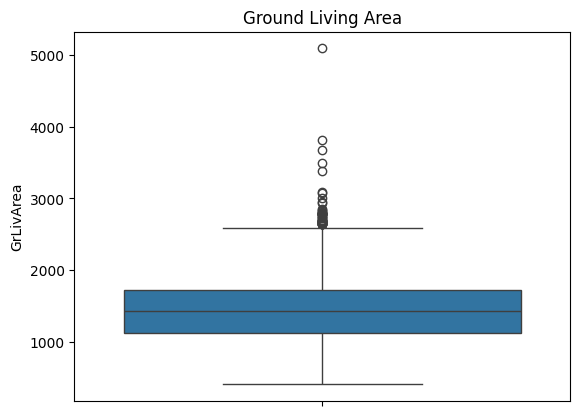

count    1459.000000
mean     1486.045922
std       485.566099
min       407.000000
25%      1117.500000
50%      1432.000000
75%      1721.000000
max      5095.000000
Name: GrLivArea, dtype: float64


In [89]:
#boxplot of Ground Area
plt.title("Ground Living Area")
sns.boxplot(y=house.GrLivArea)
plt.show()
print(house.GrLivArea.describe())

[Text(0.5, 0, 'House Styles'), Text(0, 0.5, 'Frequency of House type')]

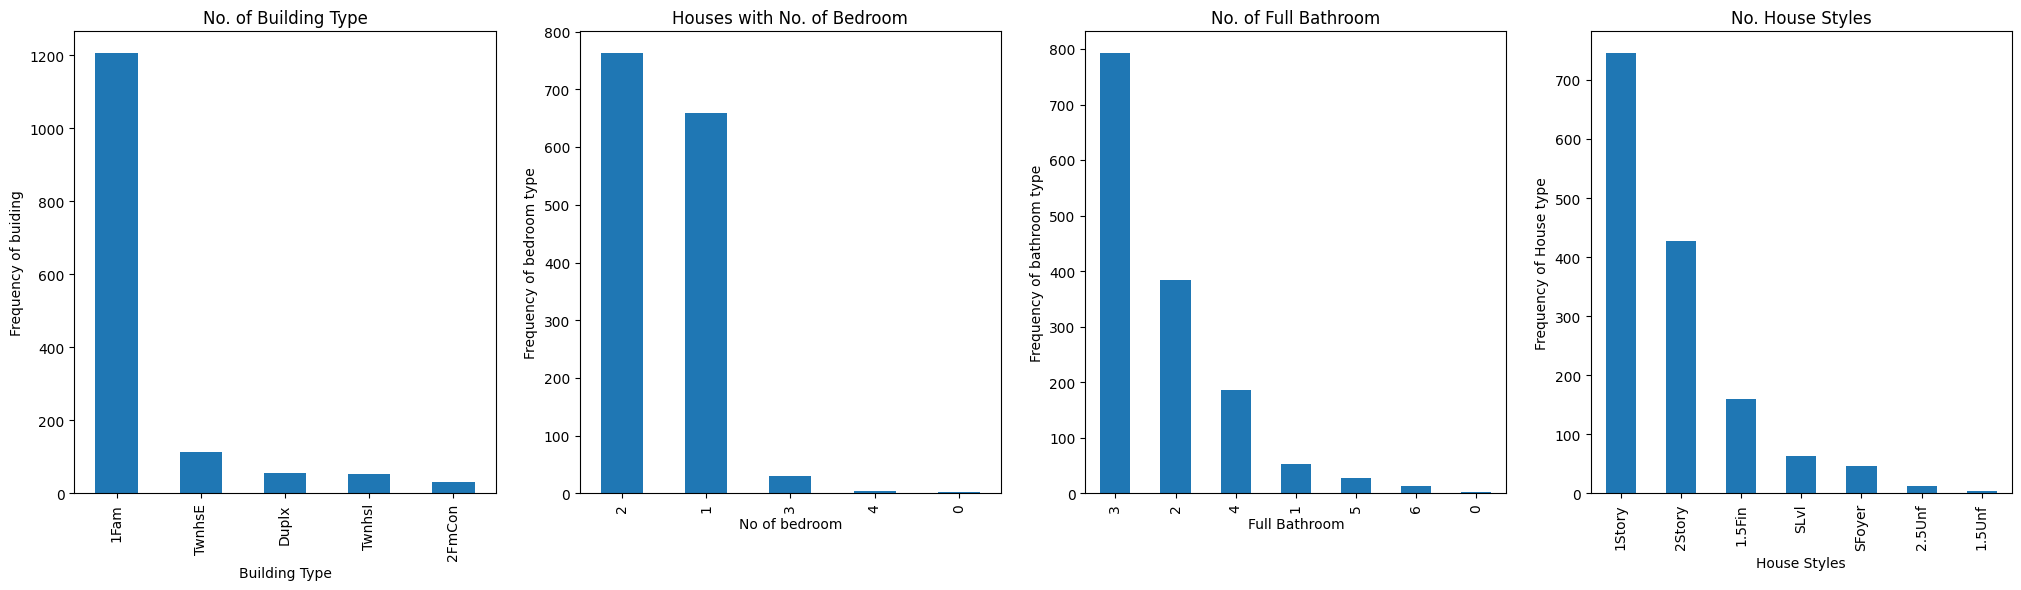

In [90]:
plt.figure(figsize=(25, 6))

plt.subplot(1,4,1)
plt1 = house.BldgType.value_counts().plot(kind = 'bar')
plt.title('No. of Building Type')
plt1.set(xlabel = 'Building Type', ylabel='Frequency of buiding')

plt.subplot(1,4,2)
plt1 = house.FullBath.value_counts().plot(kind ='bar')
plt.title('Houses with No. of Bedroom')
plt1.set(xlabel = 'No of bedroom', ylabel='Frequency of bedroom type')

plt.subplot(1,4,3)
plt1 = house.BedroomAbvGr.value_counts().plot(kind ='bar')
plt.title('No. of Full Bathroom')
plt1.set(xlabel = 'Full Bathroom', ylabel='Frequency of bathroom type')

plt.subplot(1,4,4)
plt1 = house.HouseStyle.value_counts().plot(kind ='bar')
plt.title('No. House Styles')
plt1.set(xlabel = 'House Styles', ylabel='Frequency of House type')

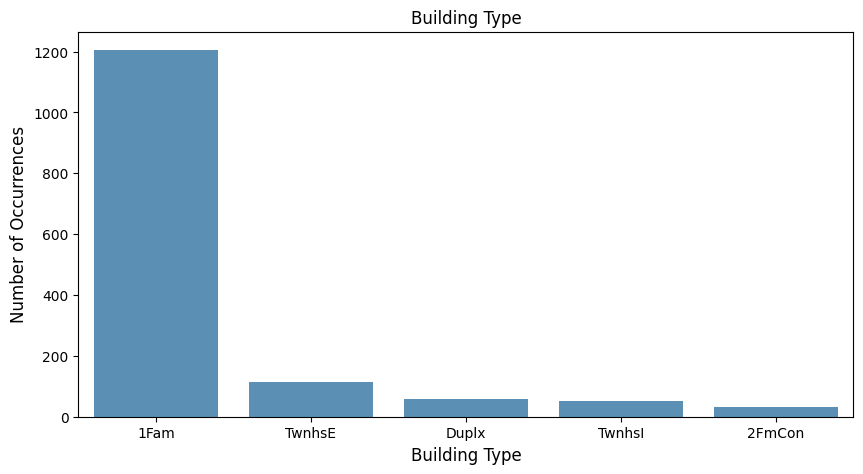

In [92]:
bldgtype  = house['BldgType'].value_counts()
bldgtype = bldgtype[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=bldgtype.index, y=bldgtype.values, alpha=0.8)
plt.title('Building Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Building Type', fontsize=12)
plt.show()

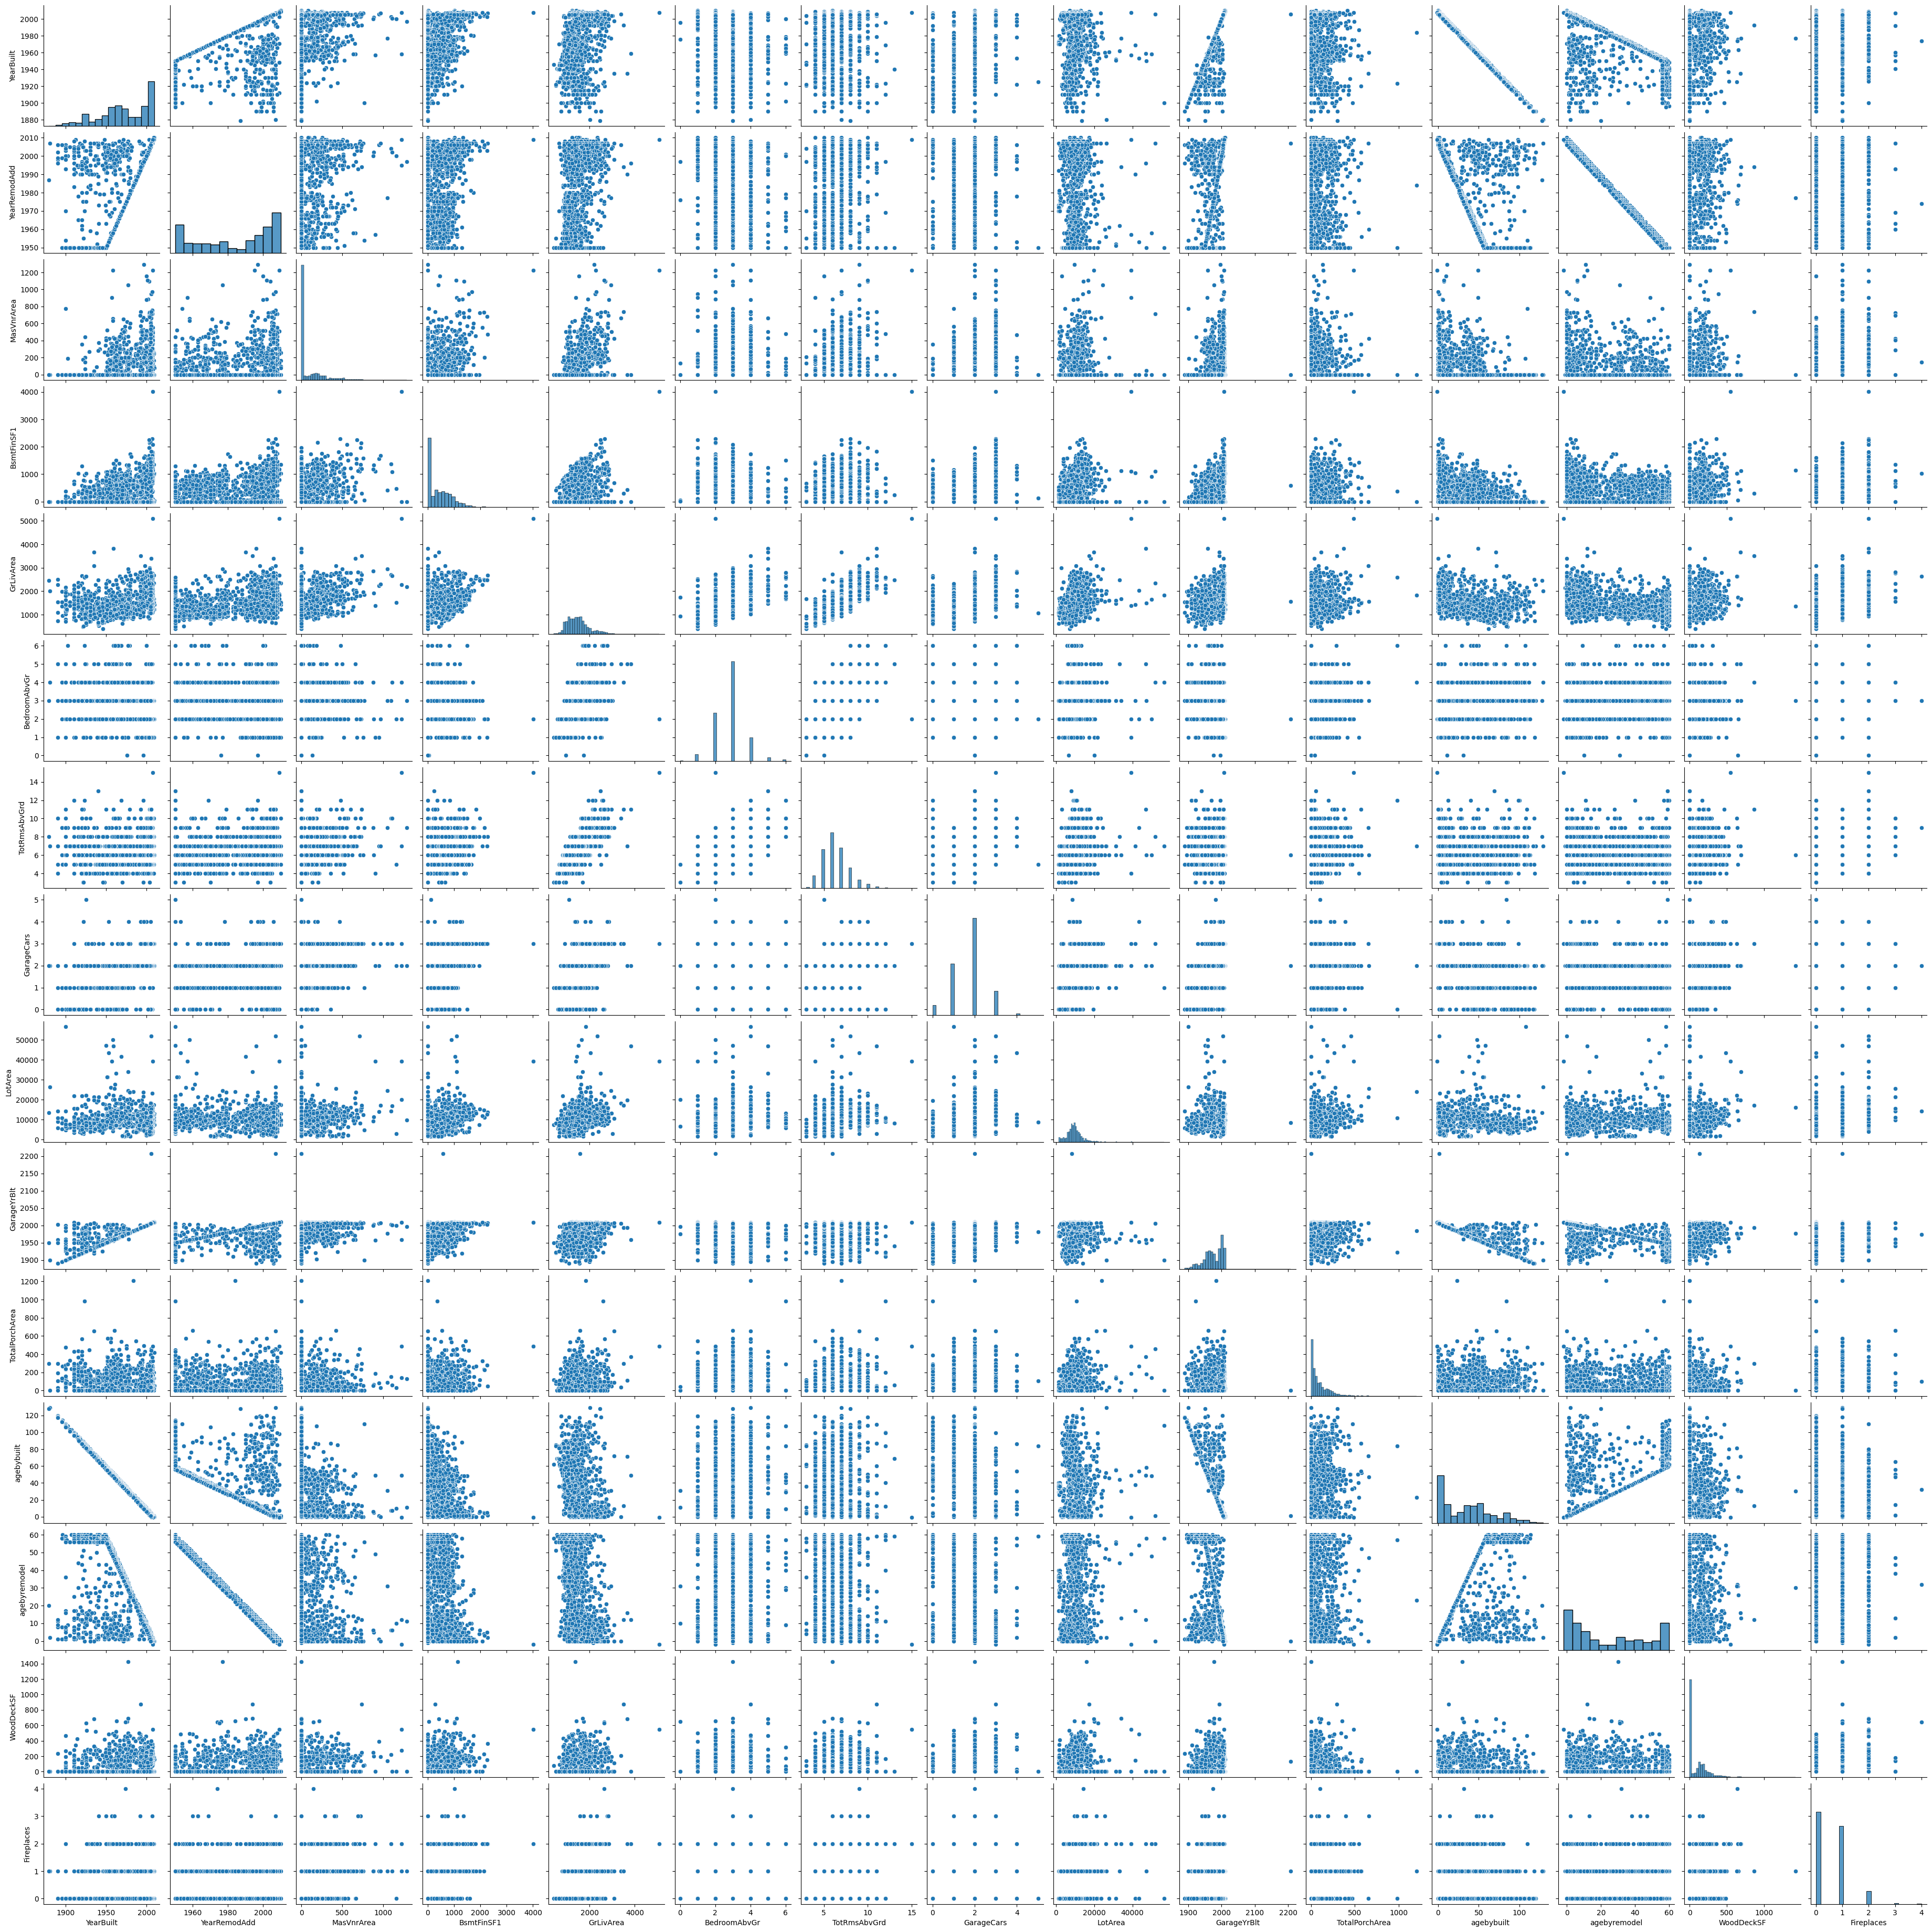

In [93]:
house_new = house[['YearBuilt', 'YearRemodAdd','MasVnrArea', 'BsmtFinSF1','GrLivArea',
                  'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'LotArea', 'GarageYrBlt','TotalPorchArea', 
                     'agebybuilt','agebyremodel', 'WoodDeckSF','Fireplaces']]
house_new.head()
sns.pairplot(house_new)
plt.show()

In [95]:
numeric_df = house.select_dtypes(include=np.number)

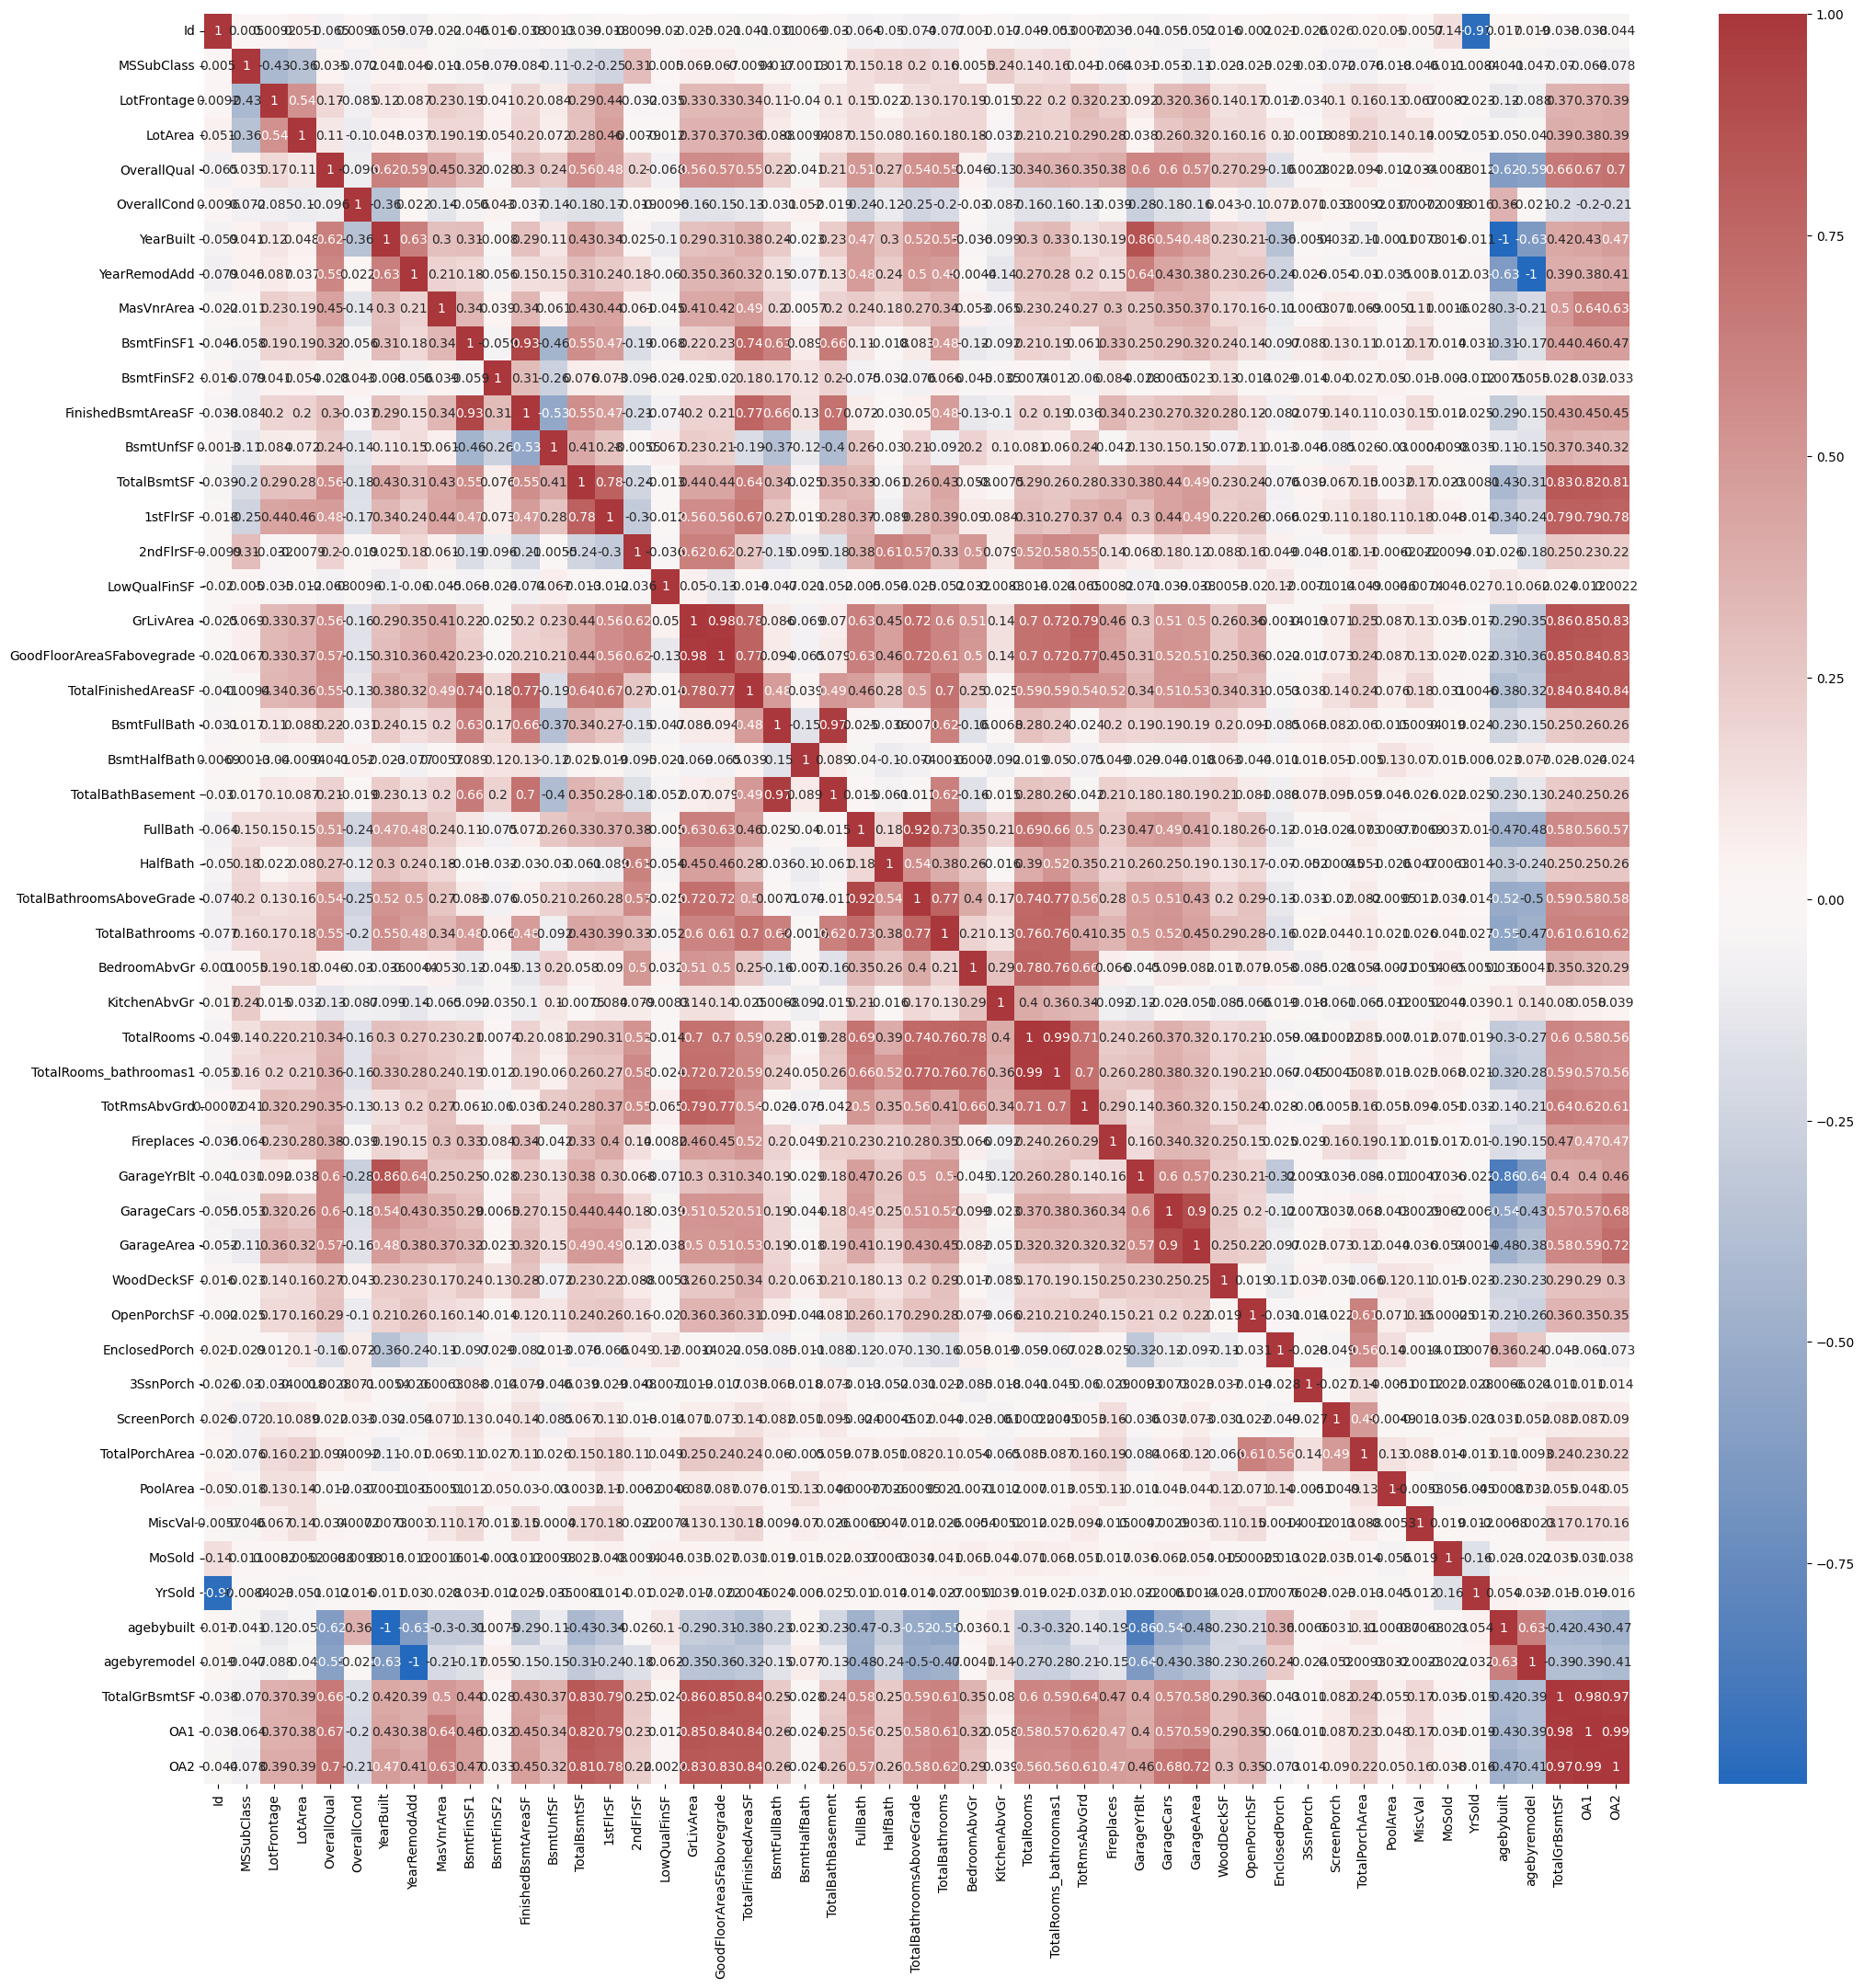

In [96]:
corrmat=numeric_df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(house[top_corr_feature].corr(), annot=True,cmap="vlag")

In [97]:
house.shape

(1459, 94)

In [98]:
#removing garage area for garage cars(0.64>0.62)
#removing OverallCond for low correlation with Salesprice
#removing BsmtFinSF2
#removing LowQualFinSF
#removing BsmtHalfBath
#removing EnclosedPorch
#removing 3SsnPorch
#removing ScreenPorch
house=house.drop("OverallCond",axis=1)
house=house.drop("GarageArea",axis=1)
house=house.drop("BsmtFinSF2",axis=1)
house=house.drop("LowQualFinSF",axis=1)
house=house.drop("BsmtHalfBath",axis=1)
house=house.drop("EnclosedPorch",axis=1)
house=house.drop("3SsnPorch",axis=1)
house=house.drop("ScreenPorch",axis=1)

In [99]:
house=house.drop("FinishedBsmtAreaSF",axis=1)
house=house.drop("FullBath",axis=1)
house=house.drop("HalfBath",axis=1)
house=house.drop("TotalBathBasement",axis=1)
house=house.drop("TotalRooms",axis=1)
house=house.drop("OA1",axis=1)

In [100]:
house.shape

(1459, 80)

In [101]:
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave    NA      Reg   
1  1462          20       RL         81.0    14267   Pave    NA      IR1   
2  1463          60       RL         74.0    13830   Pave    NA      IR1   
3  1464          60       RL         78.0     9978   Pave    NA      IR1   
4  1465         120       RL         43.0     5005   Pave    NA      IR1   

  LandContour Utilities  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0         Lvl    AllPub  ...          NA       0      6   2010       WD   
1         Lvl    AllPub  ...        Gar2   12500      6   2010       WD   
2         Lvl    AllPub  ...          NA       0      3   2010       WD   
3         Lvl    AllPub  ...          NA       0      6   2010       WD   
4         HLS    AllPub  ...          NA       0      1   2010       WD   

  SaleCondition agebybuilt  agebyremodel  TotalGrBsmtSF     OA2  
0        Normal         49            49         1778.0  2508.0  
1        Normal         52            52         2658.0  3078.0  
2        Normal         13            12         2557.0  3039.0  
3        Normal         12            12         2530.0  3020.0  
4        Normal         18            18         2560.0  3066.0  

[5 rows x 80 columns]

### Adding few missing values in the fields so that after one hot encoding both the data set should be eqaul 

In [102]:
house.Condition2

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
1454    Norm
1455    Norm
1456    Norm
1457    Norm
1458    Norm
Name: Condition2, Length: 1459, dtype: object

In [103]:
# Adding the missing values to the condition 2 to avoid confusion in one hot encoding 
values_to_add = ['RRNn', 'RRAn', 'RRAe']
house.loc[house.index[-3:], 'Condition2'] = values_to_add

print(house['Condition2'])

0       Norm
1       Norm
2       Norm
3       Norm
4       Norm
        ... 
1454    Norm
1455    Norm
1456    RRNn
1457    RRAn
1458    RRAe
Name: Condition2, Length: 1459, dtype: object


In [104]:
house.HouseStyle

0       1Story
1       1Story
2       2Story
3       2Story
4       1Story
         ...  
1454    2Story
1455    2Story
1456    1Story
1457    SFoyer
1458    2Story
Name: HouseStyle, Length: 1459, dtype: object

In [105]:
# Adding the missing values to the HouseStyle to avoid confusion in one hot encoding 
value_to_add = '2.5Fin'

# Update the value in the first row of the 'HouseStyle' column
house.loc[0, 'HouseStyle'] = value_to_add

print(house['HouseStyle'])

0       2.5Fin
1       1Story
2       2Story
3       2Story
4       1Story
         ...  
1454    2Story
1455    2Story
1456    1Story
1457    SFoyer
1458    2Story
Name: HouseStyle, Length: 1459, dtype: object


In [106]:
house.Exterior1st

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    HdBoard
1458    HdBoard
Name: Exterior1st, Length: 1459, dtype: object

In [107]:
# Adding the missing values to the Exterior1st to avoid confusion in one hot encoding 
values_to_add = ['Stone', 'ImStucc']
rows_to_update = [2, 3]  # Index positions of the rows (0-based index)

# Update the values in the specified rows of the 'Exterior1st' column
house.loc[rows_to_update, 'Exterior1st'] = values_to_add

print(house['Exterior1st'])

0       VinylSd
1       Wd Sdng
2         Stone
3       ImStucc
4       HdBoard
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    HdBoard
1458    HdBoard
Name: Exterior1st, Length: 1459, dtype: object


In [108]:
house.Exterior2nd

0       VinylSd
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    WdShing
1458    HdBoard
Name: Exterior2nd, Length: 1459, dtype: object

In [109]:
# Adding the missing values to the Exterior2nd to avoid confusion in one hot encoding 

value_to_add = 'other'

# Update the value in the first row of the 'Exterior2nd' column
house.loc[0, 'Exterior2nd'] = value_to_add

print(house['Exterior2nd'])

0         other
1       Wd Sdng
2       VinylSd
3       VinylSd
4       HdBoard
         ...   
1454    CemntBd
1455    CemntBd
1456    VinylSd
1457    WdShing
1458    HdBoard
Name: Exterior2nd, Length: 1459, dtype: object


In [110]:
house.Electrical

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
Name: Electrical, Length: 1459, dtype: object

In [111]:
# Adding the missing values to the Electrical to avoid confusion in one hot encoding 

value_to_add = 'Mix'

# Update the value in the first row of the 'Electrical' column
house.loc[0, 'Electrical'] = value_to_add

print(house['Electrical'])

0         Mix
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1454    SBrkr
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    SBrkr
Name: Electrical, Length: 1459, dtype: object


In [112]:
house.GarageQual

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1454    NA
1455    TA
1456    TA
1457    NA
1458    TA
Name: GarageQual, Length: 1459, dtype: object

In [113]:
# Adding the missing values to the GarageQual to avoid confusion in one hot encoding 

value_to_add = 'Ex'

# Update the value in the first row of the 'GarageQual' column
house.loc[0, 'GarageQual'] = value_to_add

print(house['GarageQual'])

0       Ex
1       TA
2       TA
3       TA
4       TA
        ..
1454    NA
1455    TA
1456    TA
1457    NA
1458    TA
Name: GarageQual, Length: 1459, dtype: object


In [114]:
house.PoolQC

0       NA
1       NA
2       NA
3       NA
4       NA
        ..
1454    NA
1455    NA
1456    NA
1457    NA
1458    NA
Name: PoolQC, Length: 1459, dtype: object

In [115]:
# Adding the missing values to the PoolQC to avoid confusion in one hot encoding 

value_to_add = 'Fa'

# Update the value in the first row of the 'PoolQC' column
house.loc[0, 'PoolQC'] = value_to_add

print(house['PoolQC'])

0       Fa
1       NA
2       NA
3       NA
4       NA
        ..
1454    NA
1455    NA
1456    NA
1457    NA
1458    NA
Name: PoolQC, Length: 1459, dtype: object


In [116]:
dfcheckpoint3=house

In [117]:
dfcheckpoint3.to_excel("Furture_data_clean.xlsx", index=False)

In [118]:
house.describe(include='object').T

count unique      top  freq
MSZoning       1459      5       RL  1118
Street         1459      2     Pave  1453
Alley          1459      3       NA  1352
LotShape       1459      4      Reg   934
LandContour    1459      4      Lvl  1311
Utilities      1459      2   AllPub  1457
LotConfig      1459      5   Inside  1081
LandSlope      1459      3      Gtl  1396
Neighborhood   1459     25    Names   218
Condition1     1459      9     Norm  1251
Condition2     1459      8     Norm  1441
BldgType       1459      5     1Fam  1205
HouseStyle     1459      8   1Story   744
RoofStyle      1459      6    Gable  1169
RoofMatl       1459      4  CompShg  1442
Exterior1st    1459     15  VinylSd   509
Exterior2nd    1459     16  VinylSd   510
MasVnrType     1459      4     None   894
ExterQual      1459      4       TA   892
ExterCond      1459      5       TA  1256
Foundation     1459      6    PConc   661
BsmtQual       1459      5       TA   634
BsmtCond       1459      5       TA  1295
BsmtExposure   1459      5       No   951
BsmtFinType1   1459      7      GLQ   431
BsmtFinType2   1459      7      Unf  1237
Heating        1459      4     GasA  1446
HeatingQC      1459      5       Ex   752
CentralAir     1459      2        Y  1358
Electrical     1459      5    SBrkr  1336
KitchenQual    1459      4       TA   758
Functional     1459      8      Typ  1357
FireplaceQu    1459      6       NA   730
GarageType     1459      7   Attchd   853
GarageFinish   1459      4      Unf   625
GarageQual     1459      6       TA  1292
GarageCond     1459      6       TA  1328
PavedDrive     1459      3        Y  1301
PoolQC         1459      4       NA  1455
Fence          1459      5       NA  1169
MiscFeature    1459      4       NA  1408
SaleType       1459      9       WD  1259
SaleCondition  1459      6   Normal  1204